<a href="https://colab.research.google.com/github/pankajrana1111/Image-Classification/blob/pankajrana1111-patch-1/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Loading dataset from GitHub***

In [ ]:
#getting repository from github
!git clone https://github.com/pankajrana1111/Image-Classification.git

In [ ]:
#extacting data from the archived files
!pip install patool
import patoolib
patoolib.extract_archive("Image-Classification/fashion1.rar", outdir="Image-Classification")
patoolib.extract_archive("Image-Classification/fashion2.rar", outdir="Image-Classification")
patoolib.extract_archive("Image-Classification/fashion3.rar", outdir="Image-Classification")
patoolib.extract_archive("Image-Classification/fashion4.rar", outdir="Image-Classification")
patoolib.extract_archive("Image-Classification/fashion5.rar", outdir="Image-Classification")
patoolib.extract_archive("Image-Classification/fashion6.rar", outdir="Image-Classification")

In [114]:
# importing all required libararies. The libaries are imported in the sequence of their usage.
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
import cv2
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications import VGG16
from keras.applications import imagenet_utils
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [76]:
##creating the lists of image locations
image_loc1=[os.path.join("Image-Classification/fashion1",img) for img in os.listdir("Image-Classification/fashion1")]
image_loc2=[os.path.join("Image-Classification/fashion2",img) for img in os.listdir("Image-Classification/fashion2")]
image_loc3=[os.path.join("Image-Classification/fashion3",img) for img in os.listdir("Image-Classification/fashion3")]
image_loc4=[os.path.join("Image-Classification/fashion4",img) for img in os.listdir("Image-Classification/fashion4")]
image_loc5=[os.path.join("Image-Classification/fashion5",img) for img in os.listdir("Image-Classification/fashion5")]
image_loc6=[os.path.join("Image-Classification/fashion6",img) for img in os.listdir("Image-Classification/fashion6")]

In [ ]:
##combining all the images in one list
image_loc_list=image_loc1 + image_loc2 + image_loc3 + image_loc4 + image_loc5 + image_loc6
len(image_loc_list)

In [ ]:
image_loc_list[0:10]

In [79]:
## the order of the list obtained should match with the image coloum in the dataframe data

sorted_image_list=[]
for image in data.images:
    for item in image_loc_list:
        if image in item:
            sorted_image_list.append(item)
            
### the output contains a list of image locations exactly in the same order as present in the test file. This activity was done
##  to create exactly the same labels against the obtained combined list obtained from six folders.            

In [ ]:
sorted_image_list[0:10]

In [85]:
## replacing the files coloum with sorted_image_list in train dataframe

data["files"]=sorted_image_list

#***Exploratory Data Analysis***

In [ ]:
data.head()

COMMENT: From the first look of the dataframe we observed that the target variable contains the categories of the images.

In [ ]:
#checking size of the data
data.shape

In [ ]:
#checking for any missing values in the data
data.isnull().sum()

In [ ]:
##plotting the no. of images in each category
y_labels=data.target.unique()
print (y_labels)
counts=[data.target.tolist().count(i) for i in y_labels]
print(counts)
plt.barh(y_labels,counts,align="center",alpha=0.5)
plt.show()

COMMENT: In the plot we observed that the no. of images in each category are almost equal and hence we have a balanced dataset.

In [91]:
# plotting sample images
def show_imgs(X):
    plt.figure(figsize=(8, 8))
    k = 0
    for i in range(0,4):
        for j in range(0,4):
            image = load_img(data.files[k], target_size=(224, 224))
            plt.subplot2grid((4,4),(i,j))
            plt.imshow(image)
            k = k+1
    plt.show()

In [ ]:
show_imgs(data.files)

#***Creating Lables***

In [102]:
label_encoder = preprocessing.LabelEncoder() 
labels=list(label_encoder.fit_transform(data["target"]))

In [104]:
data["labels"]=labels

In [ ]:
data.head(20)

#***Feature Extraction***

In [ ]:
# load the VGG16 network
print("[INFO] loading network...")
 
# chop the top dense layers, include_top=False
model = VGG16(weights="imagenet", include_top=False)
model.summary()

In [14]:
# Extracting/Creating features of each image in our dataset
def create_features(dataset, pre_model):
 
    x_scratch = []
 
    # loop over the images
    for imagePath in dataset:
 
        # load the input image and image is resized to 224x224 pixels
        image = load_img(imagePath, target_size=(224, 224))
        image = img_to_array(image)
 
        # preprocess the image by (1) expanding the dimensions and
        # (2) subtracting the mean RGB pixel intensity from the
        # ImageNet dataset
        image = np.expand_dims(image, axis=0)
        image = imagenet_utils.preprocess_input(image)
 
        # add the image to the batch
        x_scratch.append(image)
 
    x = np.vstack(x_scratch)
    features = pre_model.predict(x, batch_size=32)
    features_flatten = features.reshape((features.shape[0], 7 * 7 * 512))
    return x, features, features_flatten

In [15]:
image_stack, features, features_flatten = create_features(data.files, model)

In [109]:
##Creating Dataframe out of extracted features and adding target column

Pd_mat=pd.DataFrame(features_flatten)
Pd_mat["target"]=data["labels"]

In [110]:
Pd_mat.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,25049,25050,25051,25052,25053,25054,25055,25056,25057,25058,25059,25060,25061,25062,25063,25064,25065,25066,25067,25068,25069,25070,25071,25072,25073,25074,25075,25076,25077,25078,25079,25080,25081,25082,25083,25084,25085,25086,25087,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.410316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.676117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.263042,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.700193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.344919,0.0,0.0,0.0,1.241529,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.184556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.023094,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.460422,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.178869,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.635608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.248983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


#***Applying Logistics Regression***

In [ ]:
##creating X and y variables

y=Pd_mat.target
X=Pd_mat.drop(columns="target")

In [126]:
##splitting into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(4800, 25088) (4800,)
(1200, 25088) (1200,)


In [ ]:
!pip install hypopt

In [ ]:
from sklearn.model_selection import GridSearchCV
from hypopt import GridSearch
param_grid = [{'C': [0.1,1,10],'solver': ['newton-cg','lbfgs']}]
 
# Grid-search all parameter combinations using a validation set.
opt = GridSearch(model = LogisticRegression(class_weight='balanced', multi_class="auto",
                        max_iter=200, random_state=1),param_grid = param_grid)
 
opt.fit(X_train, y_train)
print(opt.get_best_params())


In [143]:
preds=opt.predict(X_test)
print("\nAccuracy on Test Data: ", accuracy_score(y_test, preds))


Accuracy on Test Data:  0.24083333333333334


In [111]:
##reading,processing and saving the image data into image_array list
j=0
image_array=[None]*len(data.files)
for i in data.files:
    image=cv2.imread(i)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    image=cv2.resize(image,(100,100),cv2.INTER_LINEAR)
    image=image.reshape(100*100)
    image_array[j]=image
    j+=1    

In [ ]:
##removing any duplicates in the Predictor Matrix
Pd_mat.drop_duplicates()

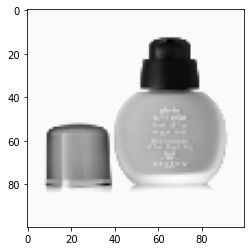

In [112]:
##displaying sample image
image_array=np.asarray(image_array)
plt.imshow(image_array[100].reshape(100,100),cmap="gray")